In [2]:
import numpy as np 
import pandas as pd

In [ ]:
%pip install mediapipe
import cv2
import numpy as np
import mediapipe as mp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 47.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 15.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, but you have cloudpickle 3.0.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4 which is incompatible.
apache-beam 2.46.0 requires protobuf<4,>3.12.2, but you have protobuf 4.25.5 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 16.1.0 which is inc

In [3]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

In [4]:
def extract_holistic_landmarks(frame, holistic):
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = holistic.process(rgb_frame)

    hand_landmarks = []
    face_landmarks = []
    pose_landmarks = []

    if results.left_hand_landmarks:
        hand_landmarks.extend([(lm.x, lm.y, lm.z) for lm in results.left_hand_landmarks.landmark])
    if results.right_hand_landmarks:
        hand_landmarks.extend([(lm.x, lm.y, lm.z) for lm in results.right_hand_landmarks.landmark])

    if results.face_landmarks:
        face_landmarks.extend([(lm.x, lm.y, lm.z) for lm in results.face_landmarks.landmark])

    if results.pose_landmarks:
        pose_landmarks.extend([(lm.x, lm.y, lm.z) for lm in results.pose_landmarks.landmark])

    all_landmarks = {
        'hand_landmarks': np.array(hand_landmarks) if hand_landmarks else None,
        'face_landmarks': np.array(face_landmarks) if face_landmarks else None,
        'pose_landmarks': np.array(pose_landmarks) if pose_landmarks else None,
    }
    
    return all_landmarks


In [5]:
def process_videos(root_folder):
    holistic = mp_holistic.Holistic(static_image_mode=False, min_detection_confidence=0.5)

    dataset = []
    labels = []

    sign_folders = os.listdir(root_folder)
    print(sign_folders)
    for sign_folder in sign_folders:
        sign_path = os.path.join(root_folder, sign_folder)
        print(f'Processing subcategory: {sign_folder}')

        if os.path.isdir(sign_path):
            video_files = [filename for filename in os.listdir(sign_path) 
                           if filename.endswith(('.MOV', '.mp4', '.avi', '.mkv', '.wmv', '.flv', '.webm'))]
            
            current_video_count = len(video_files)
            print(f'Number of videos files in {sign_folder}: {current_video_count}')
            
            for video_file in video_files:
                video_path = os.path.join(sign_path, video_file)
                print(f'Processing video: {video_path}')

                cap = cv2.VideoCapture(video_path)

                while cap.isOpened():
                    ret, frame = cap.read()
                    if not ret:
                        break

                    landmarks = extract_holistic_landmarks(frame, holistic)
                    if (landmarks['hand_landmarks'] is not None or 
                        landmarks['face_landmarks'] is not None or 
                        landmarks['pose_landmarks'] is not None):
                        combined_landmarks = []
                        if landmarks['hand_landmarks'] is not None:
                            combined_landmarks.extend(landmarks['hand_landmarks'])
                        if landmarks['face_landmarks'] is not None:
                            combined_landmarks.extend(landmarks['face_landmarks'])
                        if landmarks['pose_landmarks'] is not None:
                            combined_landmarks.extend(landmarks['pose_landmarks'])

                        dataset.append(combined_landmarks)
                        labels.append(sign_folder)  

                cap.release()

    
    dataset = np.array(dataset, dtype=object)  
    labels = np.array(labels)

    np.save('holistic_landmarks_Greetings_1of2.npy', dataset)
    np.save('holistic_landmarks_labels_Greetings_1of2', labels)

    holistic.close()


In [6]:
process_videos('/kaggle/input/include/Greetings_1of2/Greetings')

['51. Good Morning', '50. Alright', '52. Good afternoon', '49. How are you', '48. Hello']
Processing subcategory: 51. Good Morning
Number of videos files in 51. Good Morning: 21
Processing video: /kaggle/input/include/Greetings_1of2/Greetings/51. Good Morning/MVI_0047.MOV


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1731229625.636685     106 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731229625.696535     108 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731229625.703755     109 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731229625.703755     108 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731229625.705284     106 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731229625.722053     

Processing video: /kaggle/input/include/Greetings_1of2/Greetings/51. Good Morning/MVI_9934.MOV
Processing video: /kaggle/input/include/Greetings_1of2/Greetings/51. Good Morning/MVI_9935.MOV
Processing video: /kaggle/input/include/Greetings_1of2/Greetings/51. Good Morning/MVI_0048.MOV
Processing video: /kaggle/input/include/Greetings_1of2/Greetings/51. Good Morning/MVI_0099.MOV
Processing video: /kaggle/input/include/Greetings_1of2/Greetings/51. Good Morning/MVI_9970.MOV
Processing video: /kaggle/input/include/Greetings_1of2/Greetings/51. Good Morning/MVI_9993.MOV
Processing video: /kaggle/input/include/Greetings_1of2/Greetings/51. Good Morning/MVI_0045.MOV
Processing video: /kaggle/input/include/Greetings_1of2/Greetings/51. Good Morning/MVI_0098.MOV
Processing video: /kaggle/input/include/Greetings_1of2/Greetings/51. Good Morning/MVI_9991.MOV
Processing video: /kaggle/input/include/Greetings_1of2/Greetings/51. Good Morning/MVI_0100.MOV
Processing video: /kaggle/input/include/Greetings_

# Training Dataset Importing


In [ ]:
landmarks_file = 'holistic_landmarks_Greetings_1of2.npy'
labels_file = 'holistic_landmarks_labels_Greetings_1of2.npy'

# Loading the numpy arrays
x = np.load(landmarks_file, allow_pickle=True)
y = np.load(labels_file)

print(f'Landmarks shape: {x.shape}')
print(f'Labels shape: {y.shape}')

Landmarks shape: (7278,)
Labels shape: (7278,)


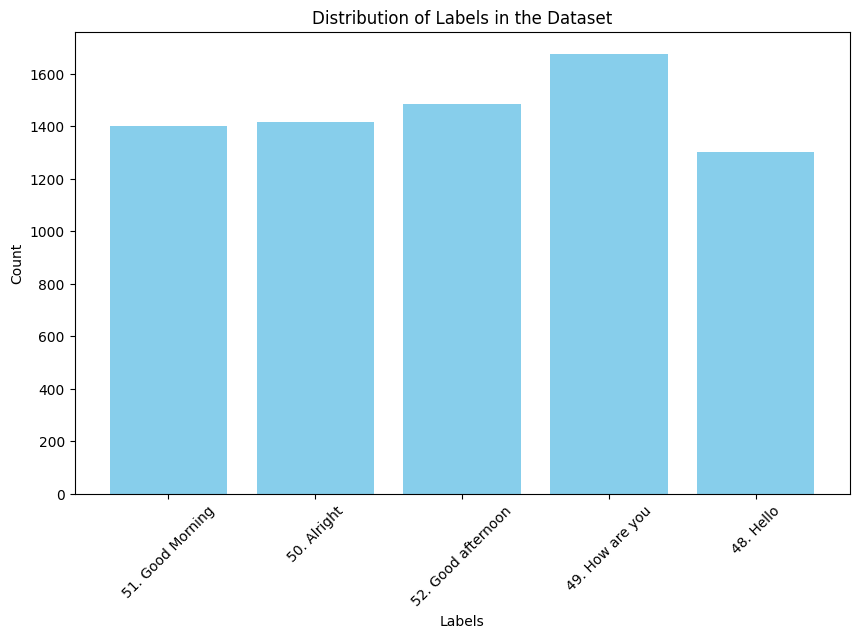

Label Distribution:
Label: 51. Good Morning, Count: 1400
Label: 50. Alright, Count: 1417
Label: 52. Good afternoon, Count: 1485
Label: 49. How are you, Count: 1676
Label: 48. Hello, Count: 1300


In [4]:
import matplotlib.pyplot as plt
from collections import Counter

# Count the occurrences of each label
label_counts = Counter(y)

labels, counts = zip(*label_counts.items())

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels in the Dataset')
plt.xticks(rotation=45)
plt.show()

print("Label Distribution:")
for label, count in label_counts.items():
    print(f'Label: {label}, Count: {count}')

In [5]:
# Check for missing items in landmarks
missing_landmarks = []
for i, landmark in enumerate(x):
    if isinstance(landmark, np.ndarray):
        if np.any(np.isnan(landmark)):
            missing_landmarks.append(i)

missing_labels = [i for i, label in enumerate(y) if label is None or label == '']

num_missing_landmarks = len(missing_landmarks)
num_missing_labels = len(missing_labels)

print(f'Total missing landmarks: {num_missing_landmarks}')
print(f'Total missing labels: {num_missing_labels}')

print(f'Indices of missing landmarks: {missing_landmarks}')
print(f'Indices of missing labels: {missing_labels}')

Total missing landmarks: 0
Total missing labels: 0
Indices of missing landmarks: []
Indices of missing labels: []


# Data Processing 

In [6]:
# Checking the shape of each landmark in x to find inconsistencies
landmark_shapes = [np.array(landmark).shape for landmark in x if isinstance(landmark, list)]

# Identify the unique shapes
unique_shapes = set(landmark_shapes)
print(f"Unique shapes found: {unique_shapes}")

# Fixing inconsistent landmarks by padding or truncating
fixed_landmarks = []
for landmark in x:
    if isinstance(landmark, list):
        landmark_array = np.array(landmark)
        if landmark_array.shape[0] < 543:
            # Pad with zeros if less than 543
            padded = np.pad(landmark_array, ((0, 543 - landmark_array.shape[0]), (0, 0)), mode='constant')
            fixed_landmarks.append(padded)
        elif landmark_array.shape[0] > 543:
            # Truncate if greater than 543
            truncated = landmark_array[:543]
            fixed_landmarks.append(truncated)
        else:
            # Append as is if it has the correct shape
            fixed_landmarks.append(landmark_array)

x_fixed = np.array(fixed_landmarks)
print(f"Fixed landmarks shape: {x_fixed.shape}")


Unique shapes found: {(543, 3), (522, 3), (501, 3)}
Fixed landmarks shape: (7278, 543, 3)


In [7]:
from sklearn.preprocessing import StandardScaler

# Normalizing the data
scaler = StandardScaler()
landmarks_data_scaled = scaler.fit_transform(x_fixed.reshape(-1, x_fixed.shape[-1]))  # Flatten for scaling
landmarks_data_scaled = landmarks_data_scaled.reshape(x_fixed.shape)  # Reshape back to original
print(f'Scaled landmarks shape: {landmarks_data_scaled.shape}')

Scaled landmarks shape: (7278, 543, 3)


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(landmarks_data_scaled, y, test_size=0.2, random_state=42)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (5822, 543, 3)
x_test shape: (1456, 543, 3)
y_train shape: (5822,)
y_test shape: (1456,)


# Artifically Creating Data using SMOTE and then Train and Test Split

In [9]:
from imblearn.over_sampling import SMOTE

# Oversample the minority classes using SMOTE
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(x_train.reshape((x_train.shape[0], -1)), y_train)
x_train_resampled = x_train_resampled.reshape((x_train_resampled.shape[0], x_train.shape[1], x_train.shape[2]))

print(f"x_train shape: {x_train_resampled.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train_resampled.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (6755, 543, 3)
x_test shape: (1456, 543, 3)
y_train shape: (6755,)
y_test shape: (1456,)


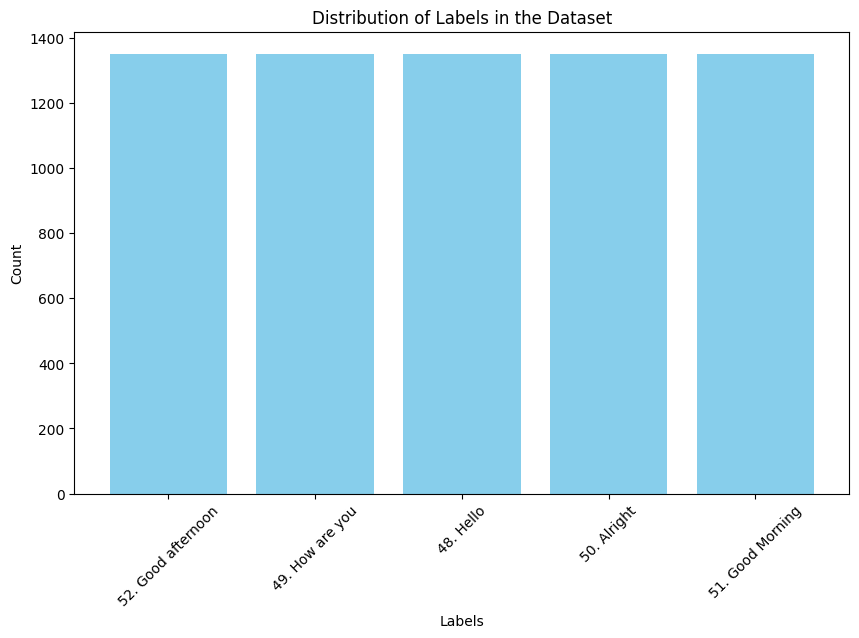

Label Distribution of Y Training:
Label: 52. Good afternoon, Count: 1351
Label: 49. How are you, Count: 1351
Label: 48. Hello, Count: 1351
Label: 50. Alright, Count: 1351
Label: 51. Good Morning, Count: 1351


In [10]:
import matplotlib.pyplot as plt
from collections import Counter

# The occurrences of each label
label_counts = Counter(y_train_resampled)

# The unique labels and their counts
labels, counts = zip(*label_counts.items())

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels in the Dataset')
plt.xticks(rotation=45)
plt.show()

# The counts
print("Label Distribution of Y Training:")
for label, count in label_counts.items():
    print(f'Label: {label}, Count: {count}')

# Data Preparing ( For Y as X has already been prepared ) 

In [11]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)  

print(f"Encoded y_train: {y_train_encoded[:5]}") 
print(f"Encoded y_test: {y_test_encoded[:5]}")

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f"Label Mapping: {label_mapping}")

Encoded y_train: [4 1 0 1 1]
Encoded y_test: [0 0 0 4 1]
Label Mapping: {'48. Hello': 0, '49. How are you': 1, '50. Alright': 2, '51. Good Morning': 3, '52. Good afternoon': 4}


In [12]:
from collections import Counter

print(f"y_train_encoded distribution: {Counter(y_train_encoded)}")
print(f"y_test_encoded distribution: {Counter(y_test_encoded)}")

y_train_encoded distribution: Counter({4: 1351, 1: 1351, 0: 1351, 2: 1351, 3: 1351})
y_test_encoded distribution: Counter({1: 325, 2: 294, 3: 289, 4: 286, 0: 262})


In [13]:
print(f"x_train shape: {x_train_resampled.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train_encoded.shape}")
print(f"y_test shape: {y_test_encoded.shape}")

x_train shape: (6755, 543, 3)
x_test shape: (1456, 543, 3)
y_train shape: (6755,)
y_test shape: (1456,)


# Model Arch

In [22]:
from keras.models import Model
from keras.layers import LSTM, Dense, Attention, Flatten, Input, Bidirectional, Dropout, Conv1D, MaxPooling1D
from keras.optimizers import Adam

# Defining input shape (length, features)
input_shape = (x_train_resampled.shape[1], x_train_resampled.shape[2])

# CNN + LSTM Model Architecture
input_layer = Input(shape=input_shape)
conv1 = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# LSTM Layers
lstm_out = Bidirectional(LSTM(128, return_sequences=True))(pool1)

# Attention Layer
attention_out = Attention()([lstm_out, lstm_out])

# Flatten and Dense Layers
flattened = Flatten()(attention_out)
dense1 = Dense(64, activation='relu')(flattened)
output_layer = Dense(len(np.unique(y_train_encoded)), activation='softmax')(dense1)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#model.summary()

# Training the model on Covo + Bi Direction LSTM + Attention

In [20]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the model for 120 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
history = model.fit(
    x_train_resampled,
    y_train_encoded,
    validation_data=(x_test, y_test_encoded),
    epochs=120,
    batch_size=64,
    callbacks = [early_stopping, reduce_lr]
)

if early_stopping.stopped_epoch > 0:
    print(f"Training stopped early at epoch: {early_stopping.stopped_epoch + 1}")
    print(f"Weights restored from epoch: {early_stopping.best_epoch + 1}")
else:
    print("Training completed without early stopping.")

Epoch 1/120
106/106 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.3212 - loss: 1.6525 - val_accuracy: 0.4107 - val_loss: 1.1417 - learning_rate: 0.0010
Epoch 2/120
106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.4800 - loss: 1.1105 - val_accuracy: 0.5371 - val_loss: 1.0158 - learning_rate: 0.0010
Epoch 3/120
106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5342 - loss: 1.0280 - val_accuracy: 0.5776 - val_loss: 0.8831 - learning_rate: 0.0010
Epoch 4/120
106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5959 - loss: 0.8917 - val_accuracy: 0.6133 - val_loss: 0.8290 - learning_rate: 0.0010
Epoch 5/120
106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.6197 - loss: 0.8356 - val_accuracy: 0.6030 - val_loss: 0.8653 - learning_rate: 0.0010
Epoch 6/120
106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.6283 - loss: 0.7909 - val_accuracy: 0.6264 - val_loss: 0.8418 - learning_rate: 0.0010
Epoch 7/120
106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.6611 - l

In [21]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

print(f"Final Training Accuracy: {training_accuracy[-1]:.4f}")
print(f"Final Validation Accuracy: {validation_accuracy[-1]:.4f}")


Final Training Accuracy: 0.9825
Final Validation Accuracy: 0.9361


# Plotting the Model Output

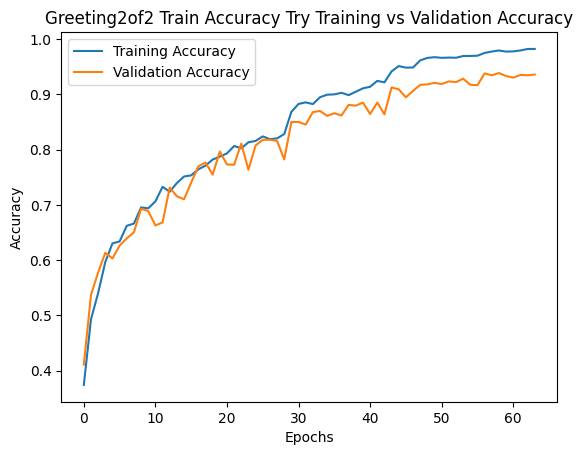

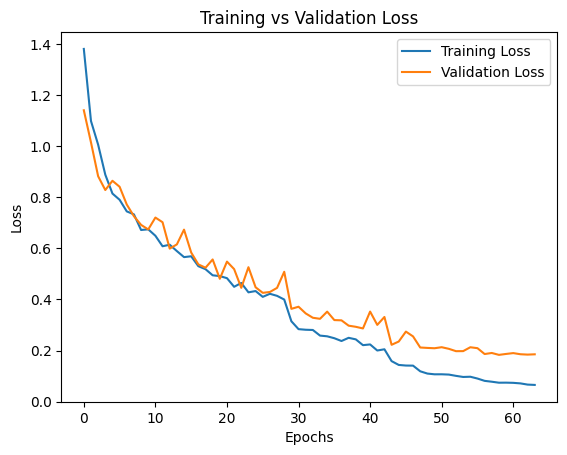

In [22]:
import matplotlib.pyplot as plt

plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Greeting2of2 Train Accuracy Try Training vs Validation Accuracy')
plt.show()

plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step


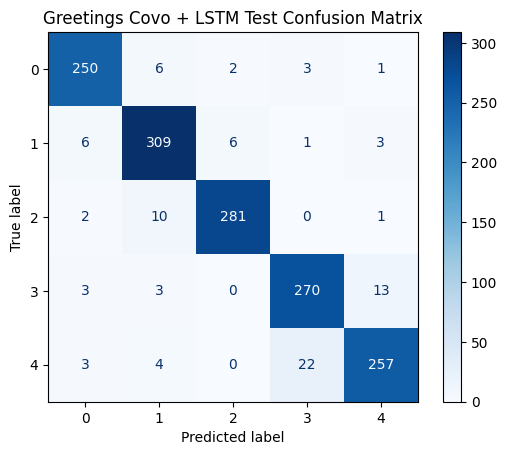

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = loaded_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  
cm = confusion_matrix(y_test_encoded, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train_encoded))
disp.plot(cmap=plt.cm.Blues)
plt.title("Greetings Covo + LSTM Test Confusion Matrix")
plt.show()

212/212 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step


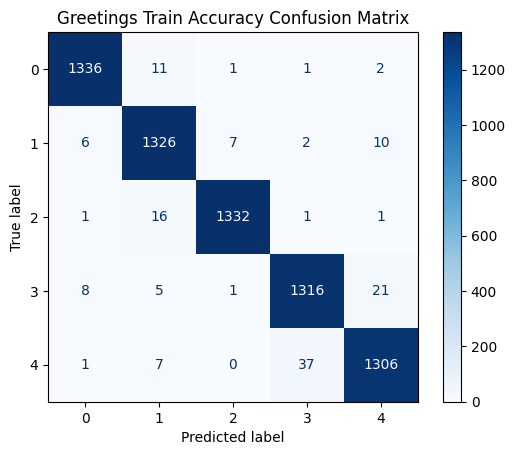

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = loaded_model.predict(x_train_resampled)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
cm = confusion_matrix(y_train_encoded, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train_encoded))
disp.plot(cmap=plt.cm.Blues)
plt.title("Greetings Train Accuracy Confusion Matrix")
plt.show()

# Save the Model

In [25]:
model_name = 'Greeting1of2' + f"{validation_accuracy[-1]:.4f}"
model.save(f"{model_name}.h5")
print(f"Model {model_name} was saved.")

Model Greeting1of20.9361 was saved.


In [1]:
from tensorflow.keras.models import load_model

loaded_model = load_model('Greeting1of20.9361.h5')

In [28]:
loss, accuracy = loaded_model.evaluate(x_test, y_test_encoded, verbose=0)

print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Loss: 0.1829
Accuracy: 0.9389


In [25]:
from sklearn.metrics import classification_report
import numpy as np

# Predicting on the test data
y_pred = loaded_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices

# Convert y_test_encoded from one-hot encoding to class indices (if necessary)
if len(y_test_encoded.shape) > 1:  # Check if one-hot encoded
    y_test_classes = np.argmax(y_test_encoded, axis=1)
else:
    y_test_classes = y_test_encoded  # Already in class index format

# Class names for the report
class_names = ["good morning", "alright", "good afternoon", "how are you", "hello"]

# Generate the classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=class_names)

# Print the classification report
print("Classification Report:")
print(report)


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step
Classification Report:
                precision    recall  f1-score   support

  good morning       0.95      0.95      0.95       262
       alright       0.93      0.95      0.94       325
good afternoon       0.97      0.96      0.96       294
   how are you       0.91      0.93      0.92       289
         hello       0.93      0.90      0.92       286

      accuracy                           0.94      1456
     macro avg       0.94      0.94      0.94      1456
  weighted avg       0.94      0.94      0.94      1456

